# 経験分布関数からのブートストラッピングのみの実装

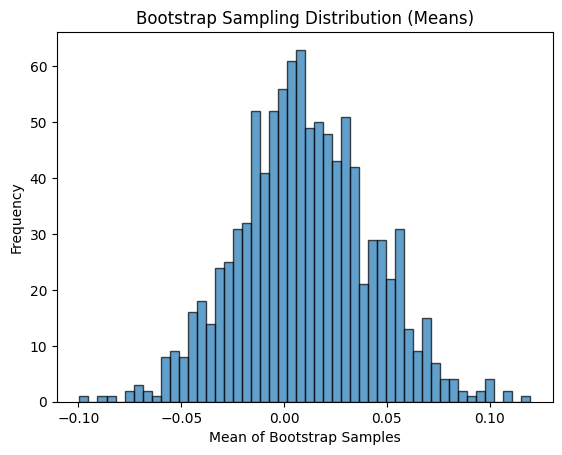

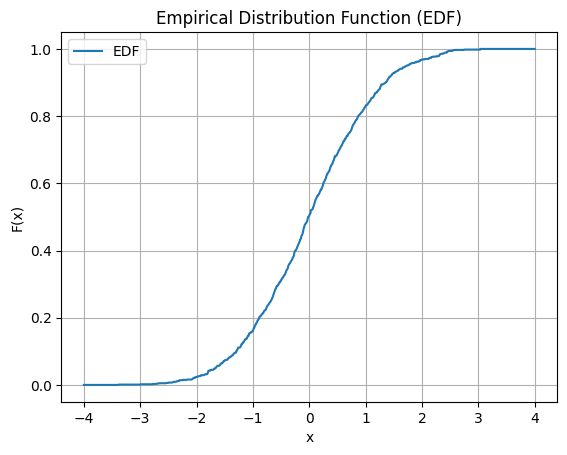

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# シードの設定 (PyTorchとNumPy)
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

# 1D正規乱数データの作成 (GPU上に転送)
x = torch.randn(1000, device='cuda')  # 1Dデータ (サンプル数: 1000)

# PyTorchテンソル（GPU上）をNumPy配列に変換
data = x.cpu().numpy()

# 経験分布関数（EDF）の計算
def empirical_distribution_function(data, x):
    return np.mean(data <= x)

# ブートストラップサンプリングの実施
def bootstrap_sampling(data, n_iterations):
    n = len(data)
    bootstrap_samples = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=n, replace=True)  # サンプリング
        bootstrap_samples.append(sample)
    return np.array(bootstrap_samples)

# ブートストラップサンプルを生成
n_iterations = 1000
bootstrap_samples = bootstrap_sampling(data, n_iterations)

# ブートストラップサンプルの平均を計算
bootstrap_means = np.mean(bootstrap_samples, axis=1)

# ブートストラップサンプルの分布を表示
plt.hist(bootstrap_means, bins=50, edgecolor='black', alpha=0.7)
plt.title("Bootstrap Sampling Distribution (Means)")
plt.xlabel("Mean of Bootstrap Samples")
plt.ylabel("Frequency")
plt.show()

# 経験分布関数を計算してプロット
x_vals = np.linspace(-4, 4, 1000)
edf_vals = [empirical_distribution_function(data, x) for x in x_vals]

plt.plot(x_vals, edf_vals, label="EDF")
plt.title("Empirical Distribution Function (EDF)")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
print(data)
print(type(data))

[ 1.94018796e-01  2.16137362e+00 -1.72050223e-01  8.49060118e-01
 -1.92439902e+00  6.52985513e-01 -6.49440825e-01 -8.17524731e-01
  5.27964473e-01 -1.27534986e+00 -1.66212630e+00 -3.03313732e-01
 -9.25698727e-02  1.99237153e-01 -1.12043285e+00  1.85765862e+00
 -7.14518845e-01  6.88105106e-01  7.96830833e-01 -3.34018767e-02
  1.49173188e+00 -5.16509295e-01 -2.54095972e-01  1.47461557e+00
 -3.26037318e-01 -1.15996265e+00  2.35513091e+00 -6.92447066e-01
  1.83742821e-01 -1.18350995e+00 -1.80286717e+00 -1.58075690e+00
  8.38669538e-01  1.41918027e+00  6.46936715e-01  4.25272405e-01
 -1.58924079e+00  6.22344971e-01  1.68980360e+00 -6.64803863e-01
  9.42542672e-01  7.83254951e-02  8.46563429e-02 -1.40829921e-01
  3.31560552e-01 -5.88976145e-01 -1.07228947e+00  9.53957587e-02
 -3.34691912e-01 -5.25797427e-01 -8.77625525e-01  3.93831372e-01
  1.63959369e-01 -1.97682247e-01  1.01041365e+00 -1.34824479e+00
 -3.49772245e-01 -6.44267976e-01  4.46783423e-01 -5.37109733e-01
  1.24231851e+00 -8.14595

(array([14., 13.,  5., 11.,  9.,  9., 12., 11.,  8.,  8.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

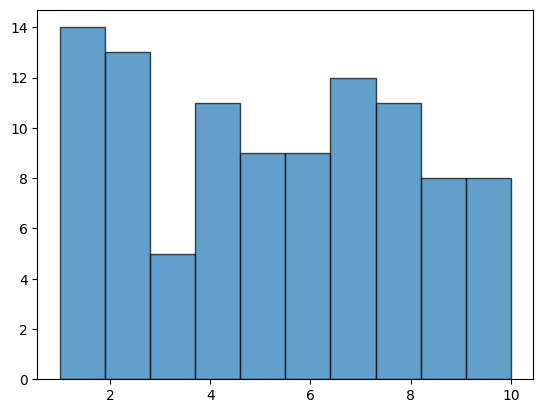

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# xからランダムサンプリング
sample_size = 100
sample = np.random.choice(x, size=sample_size)

# ヒストグラムを描画
plt.hist(sample, bins=10, edgecolor='black', alpha=0.7)